# Homework | Section 4 - Tree-based Methods

### Exercice 8 (p.332, Chap.8)

###### a) 

In [11]:
#install the library
library(ISLR)
library(tree)

#set a seed to obtain same results 
set.seed(123)

In [41]:
nrow(Carseats)

[1] 400

In [60]:
#Split the data into train/test set
train_index = sample(1:nrow(Carseats),200, replace = FALSE)
train = Carseats[train_index,]
dim(train)
test = Carseats[-train_index,]
dim(test)

[1] 200  11

[1] 200  11

###### b) 

[1] 4.395357

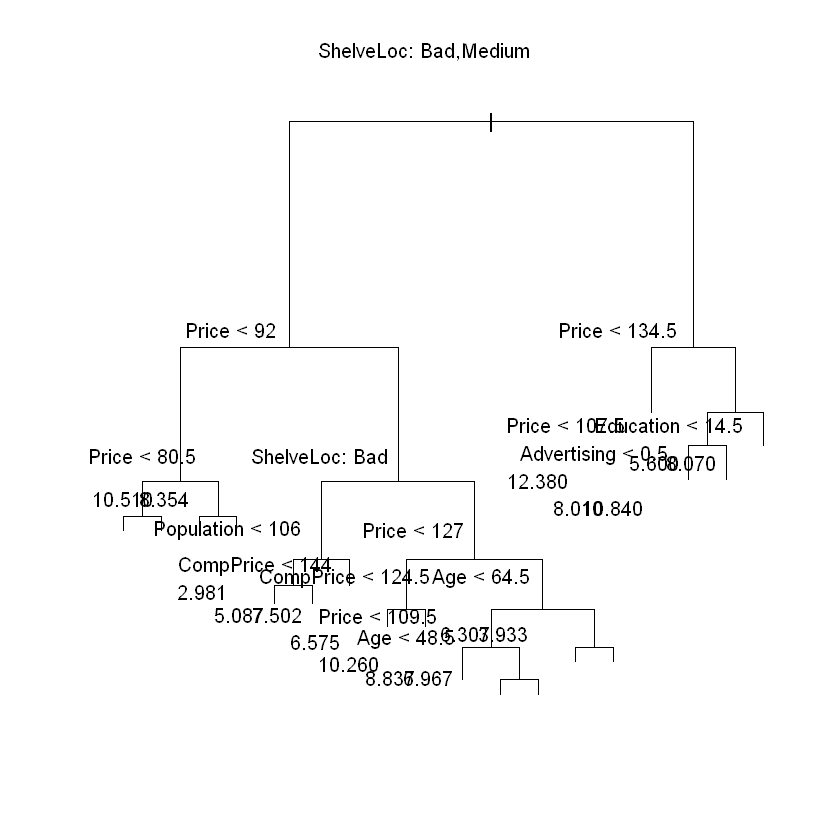

In [63]:
set.seed(123)
#fit regression trees
carseats.tree <- tree(Sales ~ ., data = Carseats, subset = train_index)
plot(carseats.tree)

#add the label
text(tree.carseats, pretty = 0)

#predict with test set
pred_tree = predict(carseats.tree, Carseats[-train_index,])

#compute RMSE
mean((Carseats[-train_index, 'Sales'] - pred_tree)^2)

So here we have a RMSE of 4.39

###### c) 

In [71]:
carseats.tree

node), split, n, deviance, yval
      * denotes terminal node

  1) root 200 1439.000  7.430  
    2) ShelveLoc: Bad,Medium 162  920.300  6.855  
      4) Price < 101.5 39  151.700  8.658  
        8) ShelveLoc: Bad 13   38.950  7.151  
         16) Income < 49 5   14.410  5.700 *
         17) Income > 49 8    7.434  8.058 *
        9) ShelveLoc: Medium 26   68.470  9.411  
         18) Age < 52 10   10.120 10.430 *
         19) Age > 52 16   41.420  8.773 *
      5) Price > 101.5 123  601.600  6.283  
       10) ShelveLoc: Bad 33  144.100  4.817  
         20) Age < 61.5 20   94.660  5.616  
           40) Population < 230 9   39.670  4.450 *
           41) Population > 230 11   32.740  6.570 *
         21) Age > 61.5 13   17.080  3.588 *
       11) ShelveLoc: Medium 90  360.500  6.821  
         22) Age < 49.5 35   79.530  7.871  
           44) Education < 16.5 25   46.910  8.363 *
           45) Education > 16.5 10   11.440  6.641 *
         23) Age > 49.5 55  217.800  6.153  
    

In [77]:
set.seed(123)
#Build a prune tree to see if result would improve 

train = sample(1:nrow(Carseats), 200)
carseats.test = Carseats[-train,]
cv.carseats = cv.tree(carseats.tree, FUN = prune.tree)
#
names(cv.carseats)
cv.carseats

[1] "size"   "dev"    "k"      "method"

$size
 [1] 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

$dev
 [1] 1031.879 1018.558 1018.558 1009.770 1034.843 1053.537 1057.967 1051.468
 [9] 1137.244 1120.642 1158.929 1156.106 1161.057 1216.548 1223.958 1207.253
[17] 1242.554 1473.414

$k
 [1]      -Inf  16.93456  17.10094  18.36513  19.36805  21.17568  22.24728
 [8]  32.41359  39.73324  41.38229  42.06332  44.28093  46.53155  63.12600
[15]  80.51350  96.97503 166.93502 281.96185

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [81]:
#search for the min dev
tree.min = which.min(cv.carseats$dev)
tree.min
#assign to the best number of node 
best_node_number = cv.carseats$size[tree.min]
best_node_number

[1] 4

[1] 15

In [89]:
#apply the prune tree model
prune.carseats = prune.tree(carseats.tree, best = best_node_number)

#predict with the test set 
prune.pred = predict(prune.carseats, Carseats[-train_index,])

#Compute RMSE
mean((Carseats[-train_index, 'Sales'] - prune.pred) ^ 2)

[1] 4.591618

We can see that Test MSE is higher for pruning tree than for complete tree

###### d)

In [92]:
install.packages("randomForest")
library(randomForest)

Warning message:
"package 'randomForest' is in use and will not be installed"


In [97]:
#show number of columns in dataset
ncol(Carseats)

[1] 11

In [99]:
#import library
install.packages("randomForest")
library(randomForest)
set.seed(123)

#perform bagging
bag.carseats = randomForest(Sales~., data = Carseats, subset = train, mtry = 11 - 1, importance = TRUE)
bag.carseats

Warning message:
"package 'randomForest' is in use and will not be installed"



Call:
 randomForest(formula = Sales ~ ., data = Carseats, mtry = 11 -      1, importance = TRUE, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.912487
                    % Var explained: 59.53

[1] 2.76144

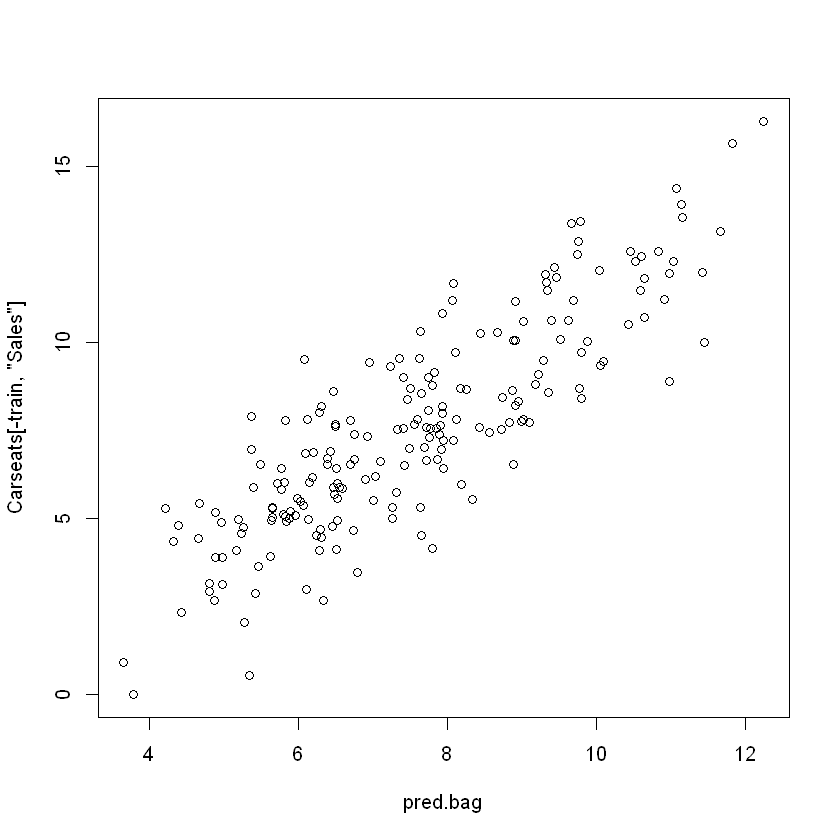

In [104]:
#how the model perform with bagging in the test set
pred.bag = predict(bag.carseats, newdata = Carseats[-train,])
plot(pred.bag, Carseats[-train, "Sales"])
mean((pred.bag - Carseats[-train, 'Sales']) ^2)

In [105]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,20.3414969,158.911610
Income,6.6237140,90.369331
Advertising,5.7777253,72.793558
Population,-2.2001506,55.786278
Price,44.3578602,380.255094
ShelveLoc,48.3345635,387.886972
Age,18.6296851,187.107660
Education,2.6619834,55.987493
Urban,0.9276070,8.152320
US,0.4202302,5.900097


The table above show us that the two most important predictors are Price and ShelveLoc

###### e)

In [110]:
#fit random forest model
randomForest.carseats = randomForest(Sales ~., data = Carseats, subset = train, importance = TRUE)

#predict 
predict_rf = predict(randomForest.carseats, Carseats[-train,])
mean((predict_rf - Carseats[-train, 'Sales'])^2)

#show importance
importance(randomForest.carseats)

[1] 3.599878

,%IncMSE,IncNodePurity
CompPrice,12.9444816,147.49611
Income,6.6084589,117.96789
Advertising,6.9069604,106.17380
Population,0.3357170,101.95501
Price,32.5771325,294.35373
ShelveLoc,32.5675741,281.79803
Age,19.8491857,208.92522
Education,2.0641098,74.37193
Urban,0.1844567,15.49980
US,1.1194444,14.48457


We have the same important predictors for randomforest as for bagging which are Price and ShelveLoc

### Exercice 9 (p.332, Chap.8)

###### a) 

In [148]:
#create train/test set

library(ISLR)
library(tree)
set.seed(1)

train = sample(1:nrow(OJ), 800)
test = -train
OJ.train = Carseats[train,]
OJ.test = Carseats[-train,]


###### b)

In [149]:
#fit the model
OJ.tree = tree(Purchase ~., data = OJ, subset = train)
summary(OJ.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ, subset = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

All the information above answer question b) 

###### c) 

In [150]:
OJ.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196197 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196197 17   12.32 M

###### d)

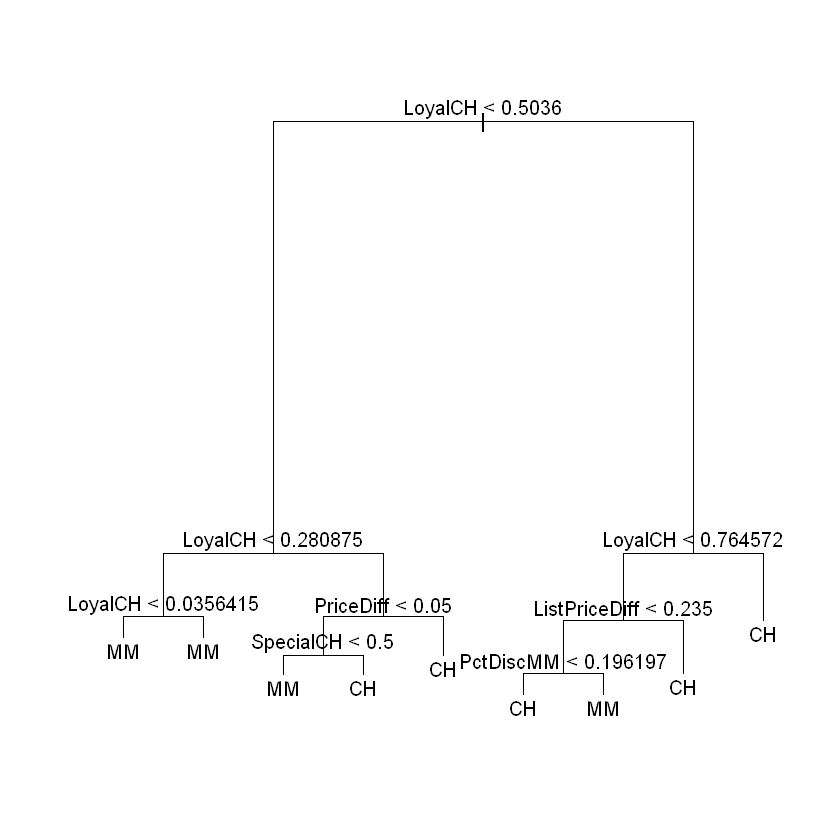

In [151]:
#plot the tree and add the text to the tree
plot(OJ.tree)
text(OJ.tree)

###### e)

In [152]:
#predict response on test set 
OJ.pred = predict(OJ.tree, OJ[test,], type = 'class')


In [153]:
nrow(OJ.test)

[1] 105

###### f) 

In [154]:
#apply cv.tree
OJ.cv <- cv.tree(OJ.tree, FUN = prune.misclass)
OJ.cv

$size
[1] 9 8 7 4 2 1

$dev
[1] 150 150 149 158 172 315

$k
[1]       -Inf   0.000000   3.000000   4.333333  10.500000 151.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

Optimal number of tree is 7 since it has the lowest deviance value

###### g)

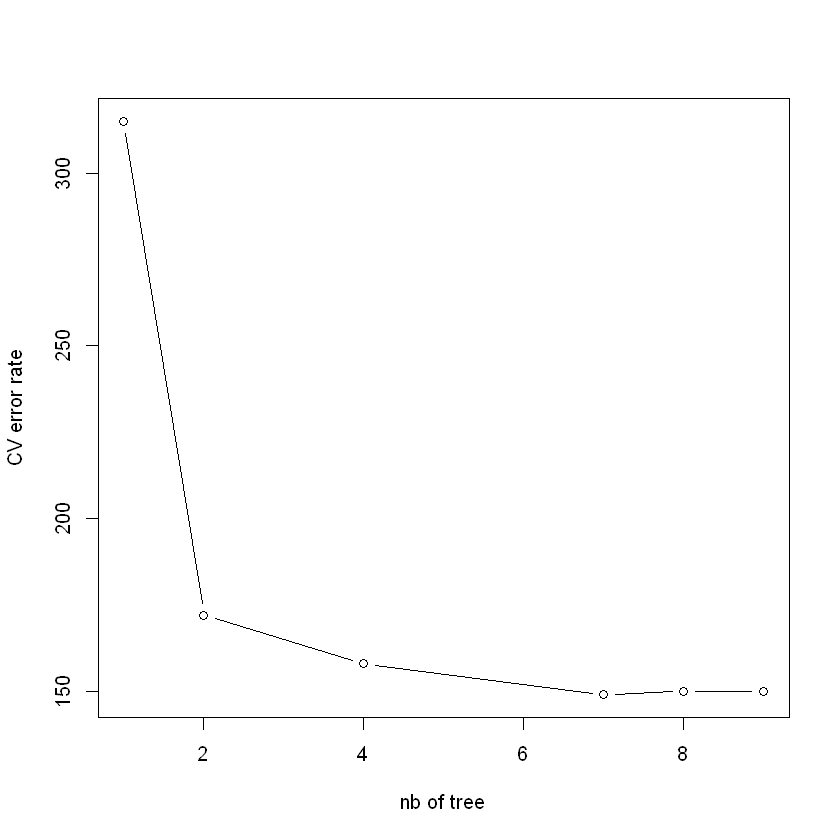

In [157]:
#plot with tree size and cross validated errors
plot(OJ.cv$size, OJ.cv$dev, xlab="nb of tree", ylab="CV error rate", type = "b")

###### i)

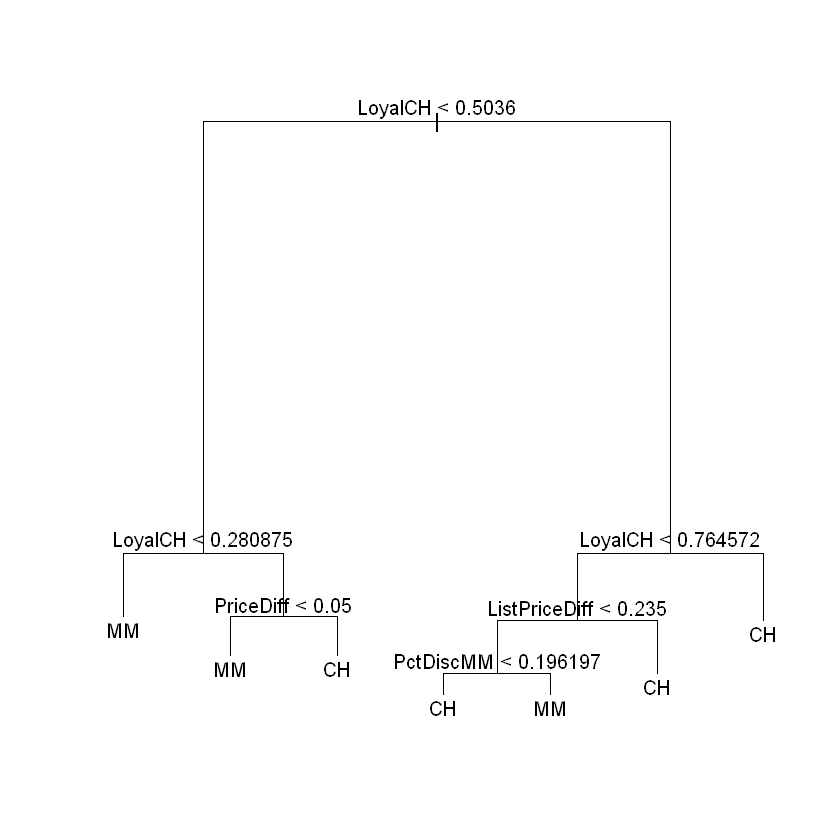

In [165]:
#apply the prune tree model
prune.OJ = prune.misclass(OJ.tree, best = 7)

plot(prune.OJ)
text(prune.OJ)

###### j)

In [168]:
summary(OJ.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ, subset = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [167]:
summary(prune.OJ)


Classification tree:
snip.tree(tree = OJ.tree, nodes = c(4L, 10L))
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "PctDiscMM"    
Number of terminal nodes:  7 
Residual mean deviance:  0.7748 = 614.4 / 793 
Misclassification error rate: 0.1625 = 130 / 800 

Training error rate is higher for pruned tree 

### Exercice 10 (p.332, Chap.8)

###### a)

In [175]:
#remove observation when salary is unknown
Hitters = na.omit(Hitters)

#log transform  Salary
Hitters$Salary = log(Hitters$Salary)

###### b)

In [178]:
#create training/test set

hitters.train = Hitters[1:200,]
hitters.test = Hitters[-(1:200),]

###### c)

In [184]:
#install.packages("gbm")
library(gbm)
set.seed(1)
boost.hitters= gbm(Salary ~., data = Hitters, distribution= "gaussian", n.trees=1000, interaction.depth = 4)
boost.hitters

gbm(formula = Salary ~ ., distribution = "gaussian", data = Hitters, 
    n.trees = 1000, interaction.depth = 4)
A gradient boosted model with gaussian loss function.
1000 iterations were performed.
There were 19 predictors of which 19 had non-zero influence.

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,15.6743818
CHits,CHits,15.3928676
CRBI,CRBI,8.7404730
CWalks,CWalks,8.4563692
PutOuts,PutOuts,5.9991581
Walks,Walks,5.8010442
CHmRun,CHmRun,5.7201852
AtBat,AtBat,4.8549428
RBI,RBI,4.2614485


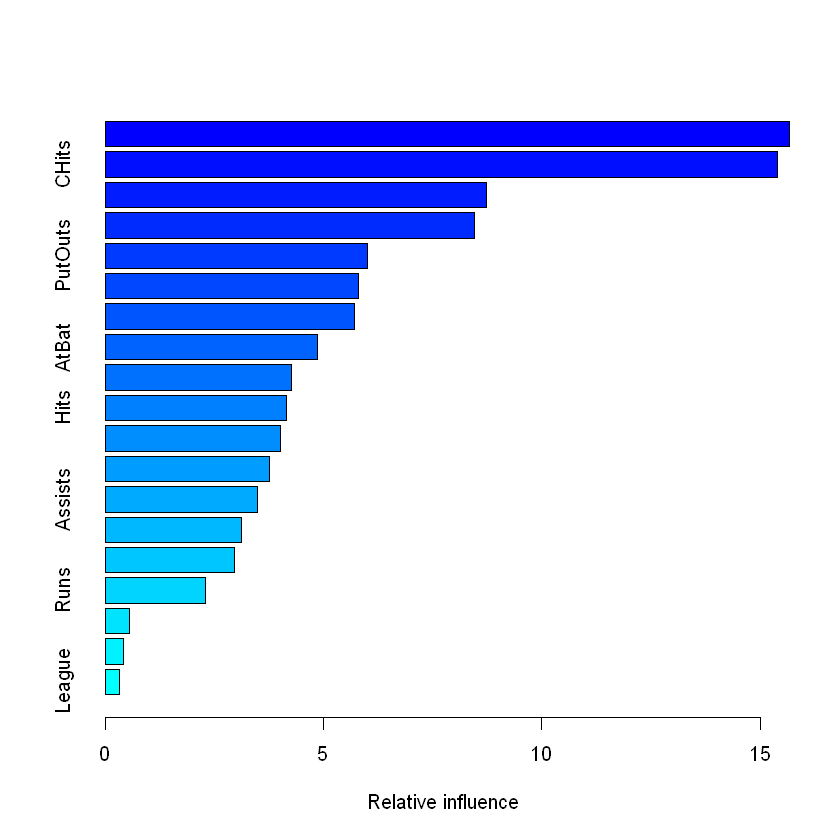

In [185]:
summary(boost.hitters)

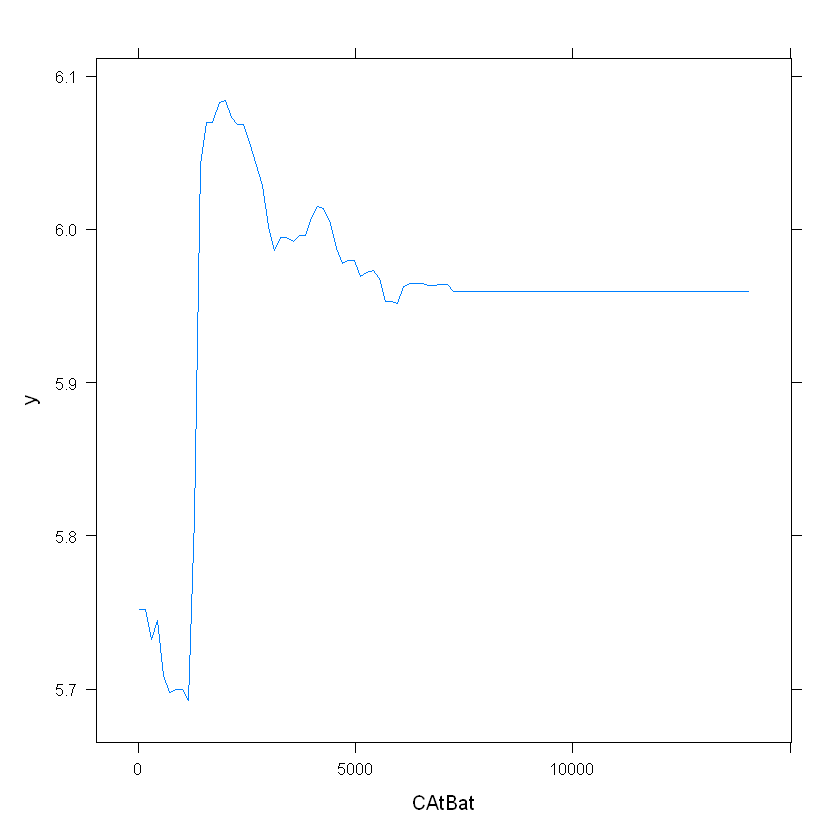

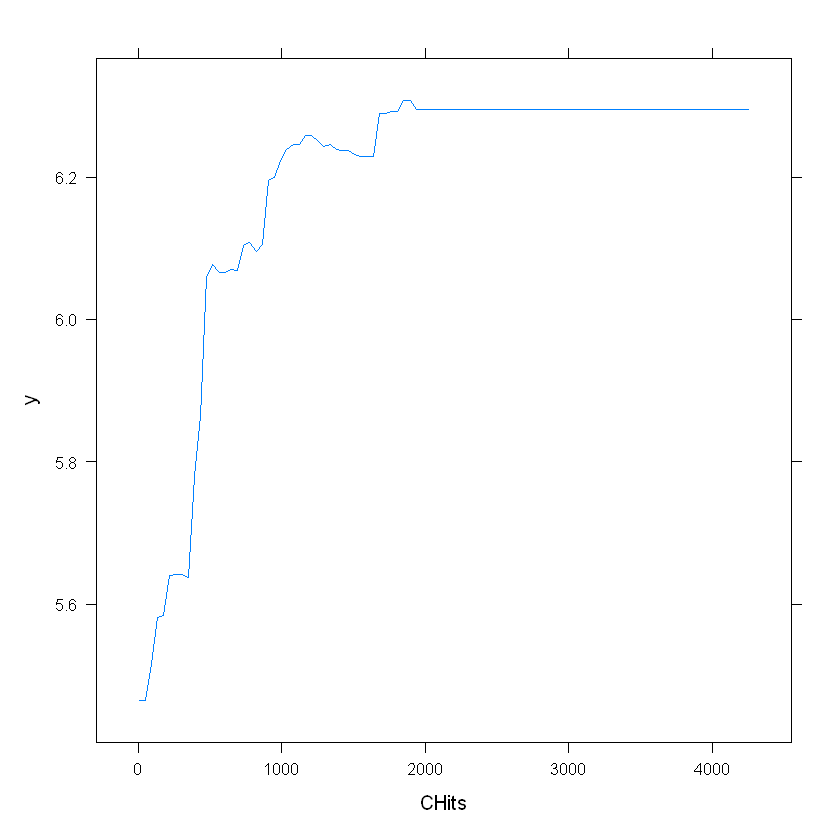

In [188]:
par(mfrow = c(1,2)) 
plot(boost.hitters, i = "CAtBat")
plot(boost.hitters, i = "CHits")

In [192]:
pred.boost = predict(boost.hitters, newdata = hitters.test, n.trees = 1000)
mean((pred.boost - hitters.test)^2)

Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"
Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"
Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"
Warning message in mean.default((pred.boost - hitters.test)^2):
"argument is not numeric or logical: returning NA"


[1] NA

 ###  Exercise 3 (p.332, Chap.8)

### Exercice 5 (p.332, Chap.8)